Investor - Flow of Funds - US
Introduction:
Special thanks to: https://github.com/rgrp for sharing the dataset.

Step 1. Import the necessary libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called

In [44]:
data = pd.read_csv("https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv")
data.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


Step 4. What is the frequency of the dataset?

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             44 non-null     object
 1   Total Equity     44 non-null     int64 
 2   Domestic Equity  44 non-null     int64 
 3   World Equity     44 non-null     int64 
 4   Hybrid           44 non-null     int64 
 5   Total Bond       44 non-null     int64 
 6   Taxable Bond     44 non-null     int64 
 7   Municipal Bond   44 non-null     int64 
 8   Total            44 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 3.2+ KB


Step 5. Set the column Date as the index.

In [46]:
df = data.set_index("Date")

In [47]:
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [ ]:
Step 6. What is the type of the index?

In [48]:
df.index.dtype

dtype('O')

In [ ]:
Step 7. Set the index to a DatetimeIndex type

In [50]:
df.index = pd.to_datetime(df.index)


In [51]:
df.index.dtype

dtype('<M8[ns]')

Step 8. Change the frequency to monthly, sum the values and assign it to monthly.

In [54]:
monthly = df.resample("ME").sum()
monthly.head()


,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0


Step 9. You will notice that it filled the dataFrame with months that don't have any data with NaN. Let's drop these rows.

In [66]:
monthly = monthly[(monthly !=0).all(axis = 1)]
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-04-30,10842,1048,9794,4931,8493,7193,1300,24267
2014-05-31,-2203,-8720,6518,3172,13767,10192,3576,14736
2014-06-30,2319,-6546,8865,4588,9715,7551,2163,16621
2014-07-31,-7051,-11128,4078,2666,7506,7026,481,3122
2014-08-31,1943,-5508,7452,1885,1897,-1013,2910,5723
2014-09-30,-2767,-6596,3829,1599,3984,2479,1504,2816
2014-11-30,-2753,-7239,4485,729,14528,11566,2962,12502


Step 10. Good, now we have the monthly data. Now change the frequency to year.

In [69]:
yearly = monthly.resample("YE").sum()
yearly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-12-31,3661,-1627,5288,2730,12149,9414,2735,18540
2014-12-31,330,-44689,45021,19570,59890,44994,14896,79787
2015-12-31,15049,-10459,25508,7280,26028,17986,8041,48357


In [ ]:
plot the total equity over time

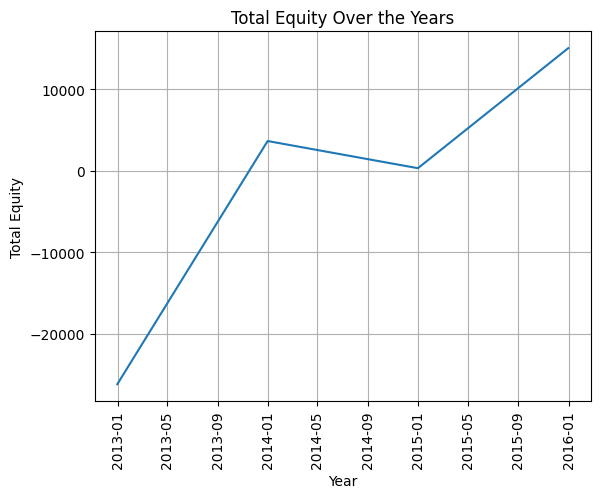

In [76]:
plt.plot(yearly['Total Equity'])
plt.title('Total Equity Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Equity')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()